<a href="https://colab.research.google.com/github/Matteriegray/kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, homogeneity_score
from sklearn import metrics
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

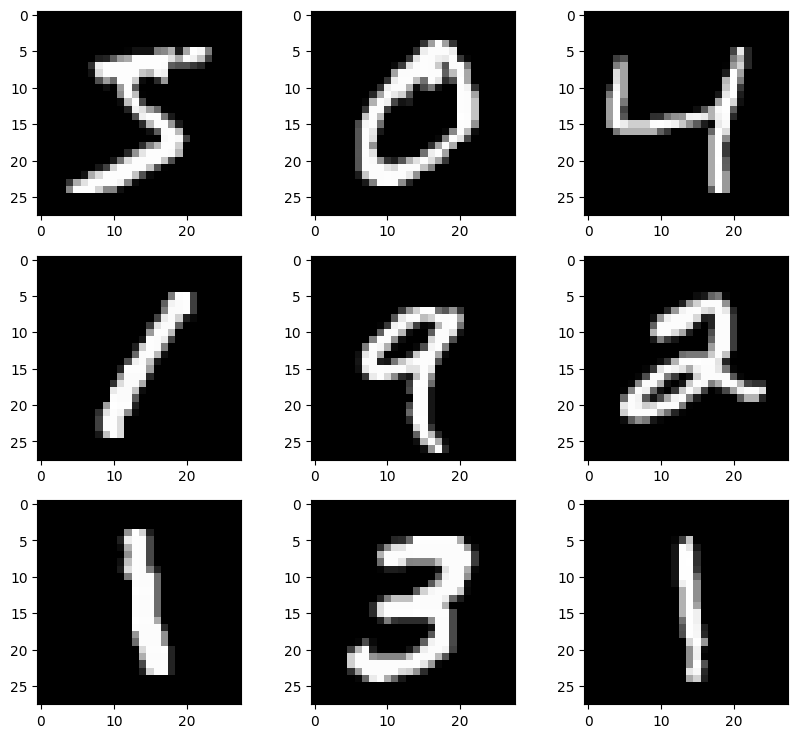

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [ ]:
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [ ]:
print(x_train.min())
print(x_train.max())

0
255


In [ ]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.min())
print(x_train.max())

0.0
1.0


In [ ]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)


kmeans.labels_

array([1, 3, 9, ..., 1, 8, 4], dtype=int32)

In [ ]:
def retrieve_info(cluster_labels,y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]
print(reference_labels)

{0: np.int64(4), 1: np.int64(8), 2: np.int64(1), 3: np.int64(0), 4: np.int64(7), 5: np.int64(3), 6: np.int64(7), 7: np.int64(2), 8: np.int64(6), 9: np.int64(4)}


In [ ]:
print(number_labels[:20].astype(int))
print(y_train[:20])

[8 0 4 1 4 2 1 8 1 4 8 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [ ]:
print(accuracy_score(number_labels,y_train))


0.6299833333333333


In [ ]:
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  kmeans = MiniBatchKMeans(n_clusters = i)
  kmeans.fit(X_train)

In [ ]:
def calculate_metrics(model,output):
 print('Number of clusters : {} '.format(model.n_clusters))
 print('Inertia : {} '.format(model.inertia_))
 print('Homogeneity : {} '.format(metrics.homogeneity_score(output,model.labels_)))


calculate_metrics(kmeans,y_train)
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))

Number of clusters : 256 
Inertia : 1505190.75 
Homogeneity : 0.842141354578088 


In [ ]:
centroids = kmeans.cluster_centers_
centroids.shape
centroids = centroids.reshape(256,28,28)
centroids = centroids * 255

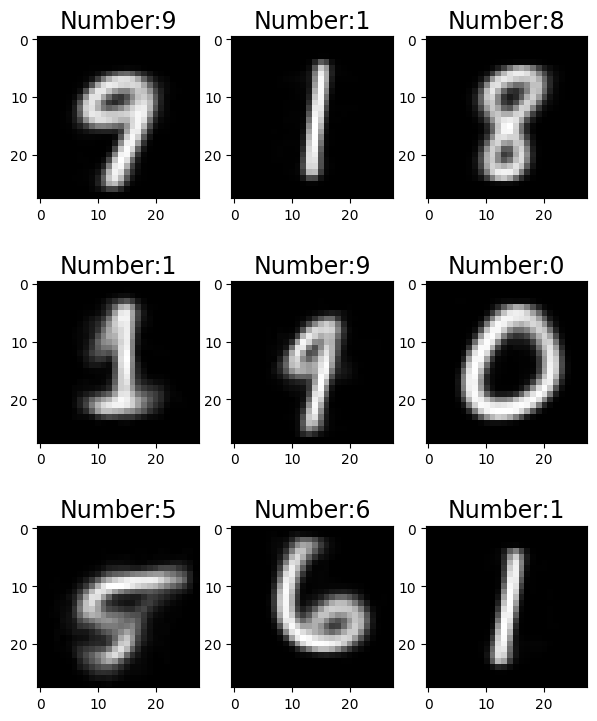

In [ ]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(9):
 plt.subplots_adjust(bottom)
 plt.subplot(3,3,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])